# What is Gradient Descent?

Gradient descent is one of basic but very important machine learning techniques to find the best optimum values, among possible ones, of weights such that it minimizes total loss values.

When we define a model such as SVM, Linear Regression or Decision Tree Classifier, we have to have some sort of a way to know if our model is being trained properly or not. And to know that, we use loss function which computes the difference between true values, usually noted as $y$ value, and predicted values, $\hat y$.

One simple loss function can be MSE whose equation is
$$L = \frac{1}{N}\sum_{i=1}^N(y_i - \hat y_i)^2 = \frac{1}{N}\sum_{i=1}^N(y_i - (x_iw + b))^2$$ 

When we first initialize a model, usually its weights are generated randomly and every time we train, we update them in a way that in the next training step, it lowers the loss value.

This process until it no more lowers the loss is called gradient descent.

# Codes & Explanation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's randomly generate x values and set y values in range (1, 10)<br>
As you may follow this, generated data will look different since it is random.

In [2]:
x = np.linspace(0, 10, 100)
y = np.random.random(100) + x + 3

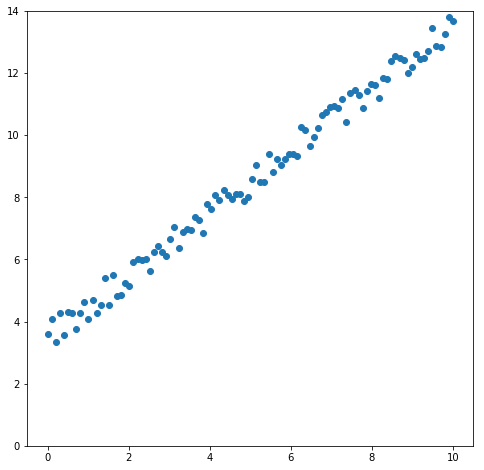

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.ylim(0, 14);

If we try to find a line that has the lowest loss values (or fits the data), it would be something like this.

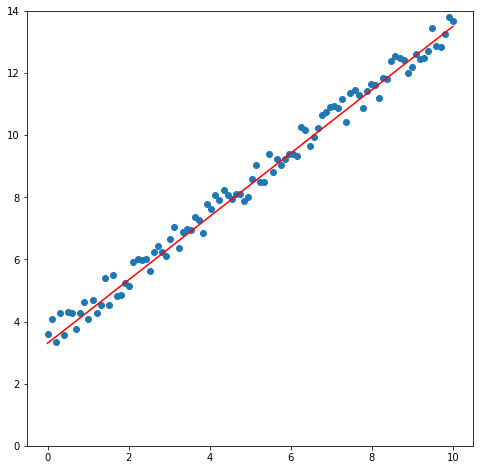

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.plot((0,10), (3.3,13.5), c='r')
plt.ylim(0, 14);

The red line was not the best line as it was manually done.

So to find the best line, let's start from 0 for both weights and bias (But in practice, weights are also initialized randomly).

In [5]:
w = b = 0

This weight and bias will look like this.

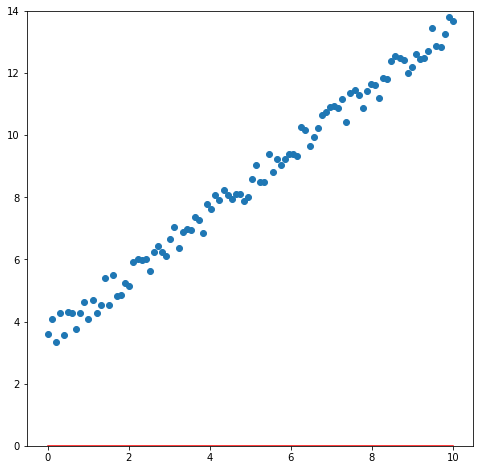

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.plot(x, x*w + b, c='r')
plt.ylim(0, 14);

And let's use the same loss function mentioned above.

To compute the gradient descent, we need partial derivatives with respect to weights and bias (if there is). The followings are corresponding equations.

$$MSE = \frac{1}{N}\sum_{i=1}^N(y_i - (x_iw + b))^2$$ 
$$\frac{\partial MSE}{\partial w} = \frac{-2}{N}\sum_{i=1}^N(y_i - (x_iw + b))x_i$$
$$\frac{\partial MSE}{\partial b} = \frac{-2}{N}\sum_{i=1}^N(y_i - (x_iw + b))$$

## Convex problem (brief overview)

Before proceeding further, let me go how we get to optain an optimal weights (and bias).

In a perfect world where there always exists one optimum, our loss values might look like this.

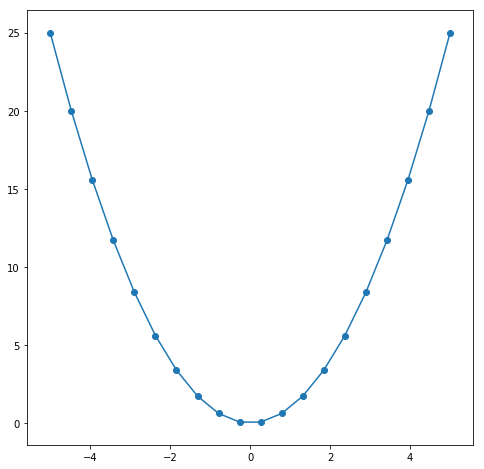

In [9]:
a = np.linspace(-5, 5, 20)

plt.figure(figsize=(8,8))
plt.plot(a, a**2)
plt.scatter(a, a**2);

We can see that at first, the loss is big and as it progresses, it moves toward 0 but after that it increases back. Cases such as above where there only exists one curve is called convex problem and in such cases, we are guaranteed to reach the optimal value.

It does not matter if the loss can actually get to 0 or not because even then, it achieves best possible minimum. 

So how do we get there? If you have taken calculus, at each point of a line there exists a tangent line (or multiple in some cases). With those tangent lines and its derivatives, we gain information on which direction we should go to reach the lowest point.

Whether the problem is convex or not, we can always reach an optimum (it could be global or local, depending on convexity of problems). Those optimal points have the derivative of 0 (horizontal line at a point).

With the above graph, we see that at point of 0 we have the horizontal line and that's where we would like to be.

So when problems are not convex, meaning there exists many points with 0 value for derivative, we are not guaranteed to reach the global optimum but most likely a local one. These cases will be covered in another post.

## Gradient Descent Implementation

The code for the partial derivatives and MSE are defined next.

In [ ]:
# Loss function
def mse(y, x, w, b):
    
    return np.mean((y - (x * w + b))**2)

# Partial Derivative with respect to w
def partial_w(y, x, w, b):
    
    return -2 * np.mean((y - (x * w + b)) * x)

# Partial Derivative with respect to b
def partial_b(y, x, w, b):
    
    return -2 * np.mean(y - (x * w + b))

Since we are using MSE which is a convex function, we know we can get to the global optimum following code.

In [10]:
w = b = 0

learning_rate = 1e-2

loss = []

for i in range(1000):

    dw = partial_w(y, x, w, b)
    db = partial_b(y, x, w, b)

    w = w - dw * learning_rate
    b = b - db * learning_rate
    
    if i % 20 == 0:
        
        l = mse(y, x, w, b)
        
        print('Loss :', l)
        
        loss.append(l)

Loss : 10.514499078021164
Loss : 2.265655332124058
Loss : 1.8737393120418069
Loss : 1.5525618361333473
Loss : 1.289355011851758
Loss : 1.0736554764081692
Loss : 0.8968884426598177
Loss : 0.7520268222769455
Loss : 0.6333118751798206
Loss : 0.5360242801147898
Loss : 0.45629652564934714
Loss : 0.39095916349281695
Loss : 0.33741481219136454
Loss : 0.2935349024174615
Loss : 0.25757505912931156
Loss : 0.22810575675446151
Loss : 0.203955490706263
Loss : 0.18416420610848025
Loss : 0.16794513236210004
Loss : 0.15465350634910258
Loss : 0.1437609409146056
Loss : 0.13483441968772297
Loss : 0.12751908321412922
Loss : 0.12152412209078227
Loss : 0.1166112163071356
Loss : 0.11258506121749007
Loss : 0.10928560351980057
Loss : 0.10658167859479169
Loss : 0.10436579626806745
Loss : 0.10254986771159237
Loss : 0.10106170361440553
Loss : 0.09984214441299356
Loss : 0.09884270849825802
Loss : 0.09802366490733856
Loss : 0.09735245388326427
Loss : 0.09680239251432905
Loss : 0.09635161399797168
Loss : 0.095982198

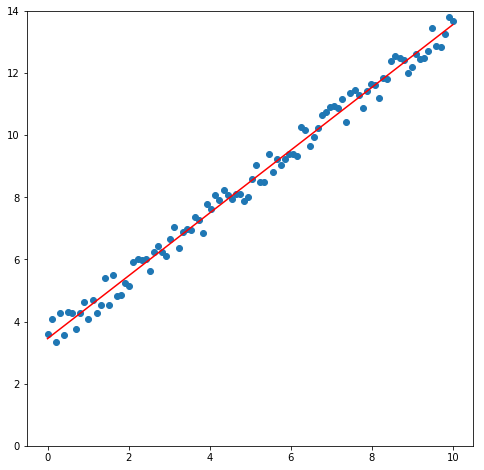

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.plot(x, x*w + b, c='r')
plt.ylim(0, 14);

In [12]:
w, b

(1.0107018337324403, 3.449569347910621)

We can see that the best w is around 1.011 and b is 3.413.

## Experiments

One very important thing in gradient descent is to choose an appropriate learning rate. Learning rate is how much we move towards the optimum value. Setting it too high will cause not being able to reach the optimal while setting it too low will make it slow.

Let's look at an example.

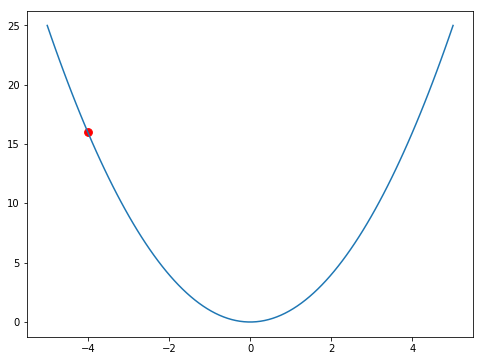

In [13]:
x = np.linspace(-5, 5, 100)
y = x**2

plt.figure(figsize=(8, 6))
plt.scatter(-4, 16, c='r', s=60)
plt.plot(x, y);

The above is the graph of $f(x) = x^2$ and our current w is -4. To get to the optimum, we have to move to the right by 4. With the derivative of the function and the learning rate of 2, we will have the new weight of 
$$w = w - lr * dw = -4 - 2 * (-8) = 12$$

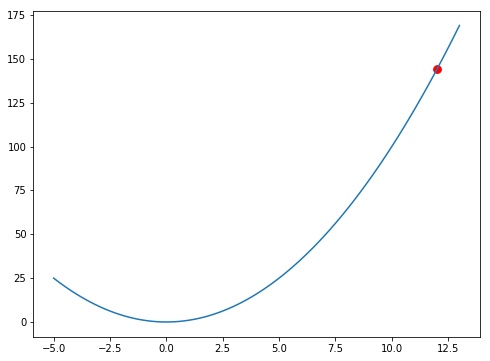

In [14]:
x = np.linspace(-5, 13, 100)
y = x**2
plt.figure(figsize=(8, 6))
plt.scatter(12, 12**2, c='r', s=60)
plt.plot(x, y);

We can see that the red dot is now much further away from the starting point because of too high learning rate.

Now we if use too low learning rate such as 0.00001, from w of -4 will be $$w = w - lr*dw = -4 - 0.00001*(-8) = -3.99992$$

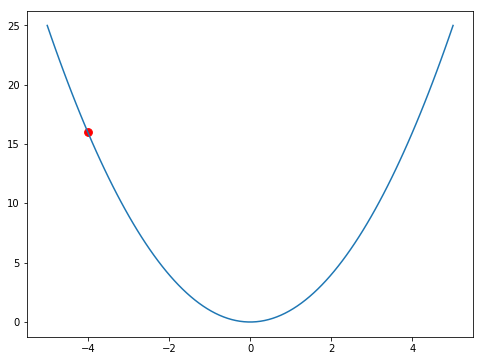

In [15]:
x = np.linspace(-5, 5, 100)
y = x**2

plt.figure(figsize=(8, 6))
plt.scatter(-3.99992, 3.99992**2, c='r', s=60)
plt.plot(x, y);

It didn't progress much that it seems as though it did nothing at all.

For such, when we try to find the best weights we have to try many different learning rates and use the best one. Let's experiment using different learning rates, with MSE we defined and w and b of 0.

In [16]:
x = np.linspace(0, 10, 100)
y = np.random.random(100) + x + 3

lr = [1, .1, .01, .001, .0001, .0001]

losses = []

for learning_rate in lr:
    
    loss = []
    w = b = 0
    
    for i in range(100):

        dw = partial_w(y, x, w, b)
        db = partial_b(y, x, w, b)

        w = w - dw * learning_rate
        b = b - db * learning_rate

        l = mse(y, x, w, b)

        loss.append(l)
            
    losses.append(loss)

/home/han/anaconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/home/han/anaconda3/envs/py/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


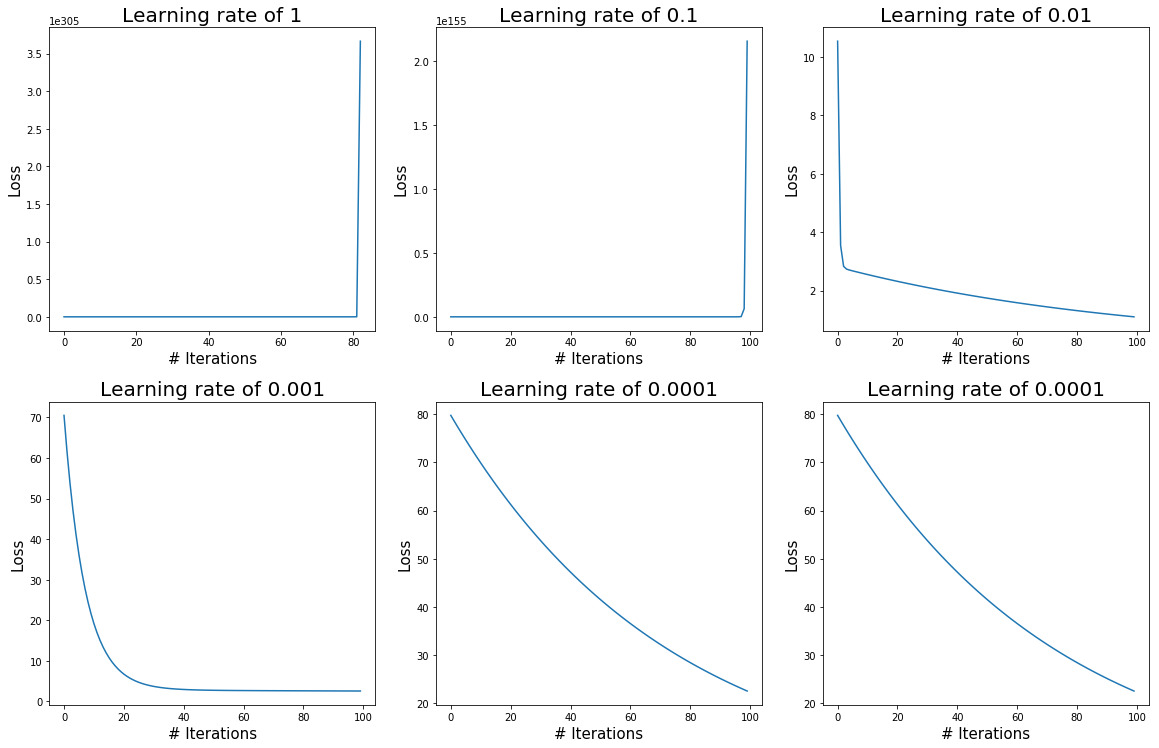

In [17]:
fig, ax = plt.subplots(2,3, figsize=(16, 10))

plt.tight_layout(h_pad=5, w_pad=3)

for i, loss in enumerate(losses):
    
    if i < 3:
        ax[0][i].plot(loss)
        ax[0][i].set_title(f'Learning rate of {lr[i]}', size=20)
        ax[0][i].set_ylabel('Loss', size=15)
        ax[0][i].set_xlabel('# Iterations', size=15)
    else:
        ax[1][i-3].plot(loss)
        ax[1][i-3].set_title(f'Learning rate of {lr[i]}', size=20)
        ax[1][i-3].set_ylabel('Loss', size=15)
        ax[1][i-3].set_xlabel('# Iterations', size=15)

The first two learning rates are set too high that the final loss is too high. The next two losses seem fine but we can see that using the learning rate of 0.001 works better (converges faster) than 0.01. The last two seem to be working as well but it converges too slow that we don't want to use or train for a longer period.

# Conclusion

We've covered what gradient descent is and how setting a different value for learning rates affects the speed of convergence of it. Gradient descent is very important concept in all of machine learning, from supervised and unsupervised to deep learning, and without understanding how it works, a model made might not be able to work well.

Thank you again for reading the post and if you have seen any typos or mistakes or have any other suggestions, please let me know.

You can find the full code at [this link]()